# Equilibrium

#### Written for the QuantEcon Africa Workshop (July 2023)
#### Author: [John Stachurski](http://johnstachurski.net/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import newton

## The Market



We consider a market for coffee beans.  The price per kilo is $p$.  Total supply at price $p$ is

$$ q_s (p) = b \sqrt{p} $$

and total demand is 

$$ q_d (p) = a \frac{1}{p}, $$

where $a$ and $b$ are positive parameters.

Now let's write routines to compute supply and demand as functions of price and parameters:

In [2]:
def supply(p, b):
    return b * np.sqrt(p)

def demand(p, a):
    return a * (1/p)

### Exercise 1

Plot both supply and demand as functions of $p$ when $a=1$ and $b=0.5$.  Plot for prices in the interval from $0.2$ up to $4$.  Although it is unusual, put price on the horizonal axis.  Use a legend to label the two functions and be sure to label the axes.  Looking at the picture, make a rough estimate of the equilibrium price,
where demand equals supply.

### Solution

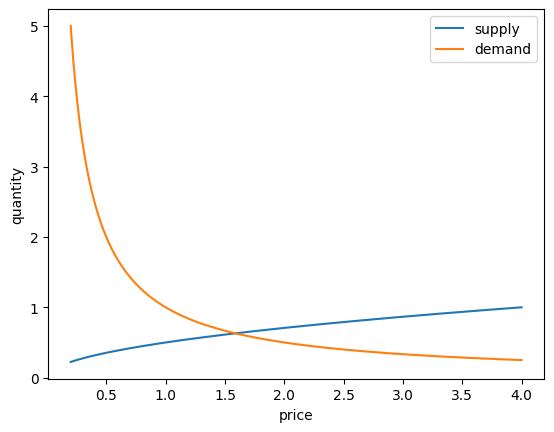

In [3]:
fig, ax = plt.subplots()
p_grid = np.linspace(0.2, 4, 200)
ax.plot(p_grid, supply(p_grid, 0.5), label='supply')
ax.plot(p_grid, demand(p_grid, 1.0), label='demand')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

The equilibrium price looks to be about 1.6.

### Exercise 2

Write a function that takes arguments $a, b, p$ and returns *excess demand*, which is defined as

$$ e(p) = q_d(p) - q_s(p) $$


### Solution

In [4]:
def excess_demand(p, a, b):
    return demand(p, a) - supply(p, b)

### Exercise 3

Write a class definition that creates a class called `Market` with four methods:

1. An `__init__` method that specifies default parameter values $a=1$ and $b=0.5$.
2. A `demand` method that returns $q_d(p)$ given $p$
3. A `supply` method that returns $q_s(p)$ given $p$
4. An `excess_demand` method that returns $q_d(p) - q_s(p)$ given $p$. 

Using an instance of the class, plot excess demand over the interval from $0.2$ up to $4$.  Also plot a horizontal line at zero.  The equilibrium price is where excess demand crosses zero.

In [5]:
class Market:
    
    def __init__(self, a=1.0, b=0.5):
        self.a, self.b = a, b
        
    def supply(self, p):
        return self.b * np.sqrt(p)
    
    def demand(self, p):
        return self.a * (1/p)
    
    def excess_demand(self, p):
        return self.demand(p) - self.supply(p)

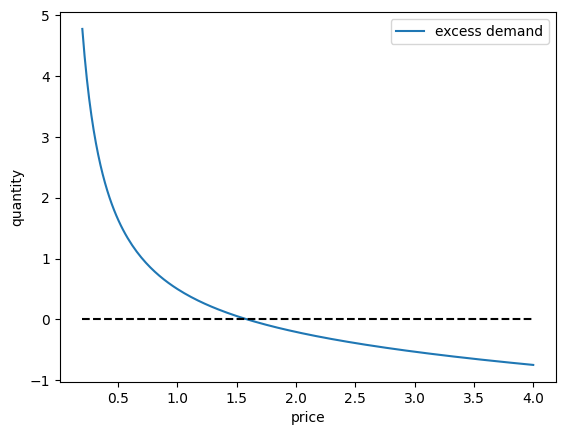

In [6]:
market = Market()

fig, ax = plt.subplots()
p_grid = np.linspace(0.2, 4, 200)
ax.plot(p_grid, market.excess_demand(p_grid), label='excess demand')
ax.plot(p_grid, np.zeros_like(p_grid), 'k--')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

Next we'll write a function that takes an instance of the `Market` class (i.e., an object `market` constructed via `market = Market()`) and returns a market clearing price via Newton's method.  If necessary, adjust your code above so that this routine works.

In [7]:
def compute_equilibrium(market, price_init=2.0):
    p_star = newton(market.excess_demand, price_init)
    return p_star

In [8]:
market = Market()
compute_equilibrium(market)

1.5874010519682002

### Exercise 4

For $b$ in a grid of 200 values between 0.5 and 1.0, plot the equilibrium price for each $b$.

Does the curve that you plotted slope up or down?  Try to provide an explanation for what you see in terms of market equilibrium.

### Solution

In [9]:
b_grid = np.linspace(0.5, 1.0, 200)
prices = np.empty_like(b_grid)
for i, b in enumerate(b_grid):
    market = Market(b=b)
    prices[i] = compute_equilibrium(market)

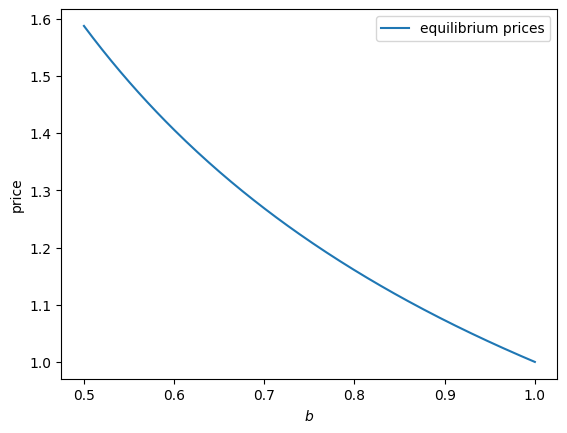

In [10]:
fig, ax = plt.subplots()
ax.plot(b_grid, prices, label="equilibrium prices")
ax.set_xlabel("$b$")
ax.set_ylabel("price")
ax.legend()
plt.show()

The curve slopes down because an increase in $p$ pushes up supply at any given price.  (In other words, the supply curve shifts up.)  With greater supply, the price tends to fall.

### Exercise 5: Computing Present Value

Imagine you have the opportunity to receive $500 two years from now. If the annual discount rate is 5%, what is the present value of this future cash flow?

*Hint: Use the formula of [present value](https://en.wikipedia.org/wiki/Present_value).*

In [2]:
def present_value(FV, r, n):
    # TODO: implement the present value formula
    PV = FV / (1 + r)**n
    return round(PV, 2);

In [3]:
try:
    assert abs(present_value(500, 0.05, 2) - 453.51) < 1e-2
    print("Test passed!")
except AssertionError:
    print("Test failed.")
except Exception as e:
    print(f"An error occurred during testing: {e}")

Test passed!


### Exercise 6: Evaluating a Series of Future Cash Flows

Suppose you are evaluating an investment that promises to pay $1000 at the end of each year for the next five years. If your discount rate is still 5% per annum, what is the present value of these future cash flows?

*Hint: In this case, you will have to sum the present values of each future cash flow.*

In [4]:
def present_value_series(annual_cash_flow, r, years):
    # TODO: Finish the function
    result = sum([annual_cash_flow / (1 + r)**n for n in years])
    return round(result, 2);

In [5]:
try:
    assert abs(present_value_series(1000, 0.05, range(1, 6)) - 4329.48) < 1e-2
    print("Test passed!")
except AssertionError:
    print("Test failed.")
except Exception as e:
    print(f"An error occurred during testing: {e}")

Test passed!


### Exercise 7: Asset Pricing Using the Present Value Model

Consider a stock that is expected to pay dividends of $100 at the end of each year for the next three years, after which point it is expected to be sold for $1500. If the annual discount rate is 6%, calculate:

1. The present value of the dividends.
2. The present value of the terminal price of the stock.
3. The total present value of the stock (which should be equal to its current price).

*Hint: Use the same method as in the second exercise for the dividends, and the method from the first exercise for the terminal price.*

In [6]:
def calculate_stock_value(dividend, terminal_price, r, years):
    # Todo: Finish the function
    dividend = 100
    terminal_price = 1500
    r = 0.06
    years = range(1, 4)  # from 1 to 3 inclusive
    PV_dividends = sum([dividend / (1 + r)**n for n in years])
    PV_terminal = terminal_price / (1 + r)**3
    PV_total = PV_dividends + PV_terminal
    return round(PV_dividends, 2), round(PV_terminal, 2), round(PV_total, 2)

In [7]:
try:
    PV_dividends, PV_terminal, PV_total = calculate_stock_value(100, 1500, 0.06, range(1, 4))
    assert abs(PV_dividends - 267.3) < 1e-2
    assert abs(PV_terminal - 1259.43) < 1e-2
    assert abs(PV_total - 1526.73) < 1e-2
    print("Test passed!")
except AssertionError:
    print("Test failed.")
except Exception as e:
    print(f"An error occurred during testing: {e}")

Test passed!
